<a href="https://colab.research.google.com/github/karen-wang/goodreads-by-gender/blob/master/Goodreads_By_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goodreads by Gender
Do Goodreads users rate books differently based on an author's gender? Let's look at the data to find out.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
names_df = pd.read_csv('/content/drive/My Drive/goodreads/yob1994.txt', header=None)

In [ ]:
# Make name to gender map
name_to_gender = {}
for index, row in names_df.iterrows():
  name = row[0].lower()
  gender = row[1].lower()
  assert gender == 'f' or gender == 'm'
  if name in name_to_gender:
    if name_to_gender[name] == gender or name_to_gender[name] == 'neutral':
      continue
    else:
      # we found a new gender neutral name
      name_to_gender[name] = 'neutral'
  else:
    name_to_gender[name] = gender

In [ ]:
df = pd.read_csv('/content/drive/My Drive/goodreads/books.csv')

In [ ]:
# First, we don't assume consistent ratings for authors. This means we don't separate by unique author names.
# Make lists of ratings by gender
female_ratings = []
male_ratings = []
neutral_ratings = []  # name can be either male or female
unknown_ratings = []
for index, row in df.iterrows():
  authors = row['authors'].split('/')
  rating = float(row['average_rating'])
  for author in authors:
    first_name = author.split()[0].lower()
    if first_name not in name_to_gender:
      unknown_ratings.append(rating)
    elif name_to_gender[first_name] == 'f':
      female_ratings.append(rating)
    elif name_to_gender[first_name] == 'm':
      male_ratings.append(rating)
    elif name_to_gender[first_name] == 'neutral':
      neutral_ratings.append(rating)

In [ ]:
print(len(female_ratings))
print(len(male_ratings))
print(len(neutral_ratings))
print(len(unknown_ratings))

2579
3603
10141
2914


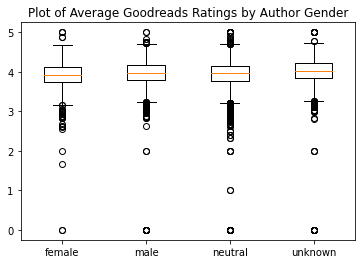

In [ ]:
import matplotlib.pyplot as plt
data = [female_ratings, male_ratings, neutral_ratings, unknown_ratings]
fig, ax = plt.subplots()
ax.set_title('Plot of Average Goodreads Ratings by Author Gender')
bp = ax.boxplot(
    data, 
    showfliers=True, 
    labels=['female', 'male', 'neutral', 'unknown'])

plt.show()

In [ ]:
names_df.head()

,0,1,2
0,Jessica,F,32117
1,Ashley,F,30278
2,Emily,F,24149
3,Samantha,F,22820
4,Sarah,F,22291


In [ ]:
# Have another go at the gender map, this time with an attempt to reduce gender-neutral names.
# Heuristic: if a name can be either male or female but one of them has a percentage less than or equal to 0.1%, don't count it
# Ex. If 10,000 people were named David but only 10 of them were female, then David is a male name
# Also, remove books with ratings of 0

# Make name to gender map
female_names = {}
male_names = {}
for index, row in names_df.iterrows():
  name = row[0].lower()
  gender = row[1].lower()
  count = int(row[2])
  assert gender == 'f' or gender == 'm'
  if gender == 'f':
    if name not in female_names:
      female_names[name] = count
    else:
      female_names[name] += count
  else:  # male
    if name not in male_names:
      male_names[name] = count
    else:
      male_names[name] += count

In [ ]:
# Determine gender neutrality of names
name_to_gender = {}
for name, female_count in female_names.items():
  if name in male_names:  # might be gender-neutral
    male_count = male_names[name]
    total_count = female_count + male_count
    if (total_count == 0):
      continue
    if (float(female_count)/total_count >= 0.95):
      name_to_gender[name] = 'f'
    elif (float(male_count)/total_count >= 0.95):
      name_to_gender[name] = 'm'
    else:
      name_to_gender[name] = 'neutral'
  else:  # definitively female
    name_to_gender[name] = 'f'

# get remaining definitive male names
for name, female_count in male_names.items():
  if name in name_to_gender:
    continue
  name_to_gender[name] = 'm'

In [ ]:
# Make lists of ratings by gender
female_ratings = []
male_ratings = []
neutral_ratings = []  # name can be either male or female
unknown_ratings = []
for index, row in df.iterrows():
  authors = row['authors'].split('/')
  rating = float(row['average_rating'])
  if (rating == 0):
    continue
  for author in authors:
    first_name = author.split()[0].lower()
    if first_name not in name_to_gender:
      unknown_ratings.append(rating)
    elif name_to_gender[first_name] == 'f':
      female_ratings.append(rating)
    elif name_to_gender[first_name] == 'm':
      male_ratings.append(rating)
    elif name_to_gender[first_name] == 'neutral':
      neutral_ratings.append(rating)

In [ ]:
print(len(female_ratings))
print(len(male_ratings))
print(len(neutral_ratings))
print(len(unknown_ratings))

4533
10707
1046
2903


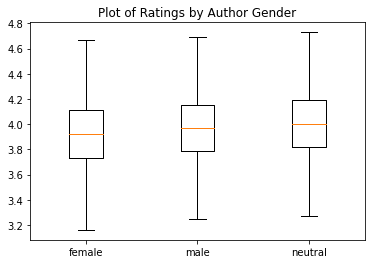

In [ ]:
data = [female_ratings, male_ratings, neutral_ratings + unknown_ratings]
fig, ax = plt.subplots()
ax.set_title('Plot of Ratings by Author Gender')
bp = ax.boxplot(
    data, 
    showfliers=False, 
    sym='+',
    labels=['female', 'male', 'neutral'])

plt.show()

In [ ]:
import numpy as np
print(np.median(female_ratings))
print(np.median(male_ratings))
print(np.median(neutral_ratings + unknown_ratings))

3.92
3.97
4.0


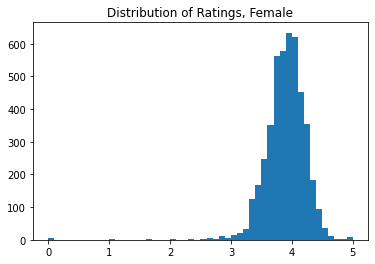

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Distribution of Ratings, Female')
hist = ax.hist([female_ratings], bins=50)
plt.show()

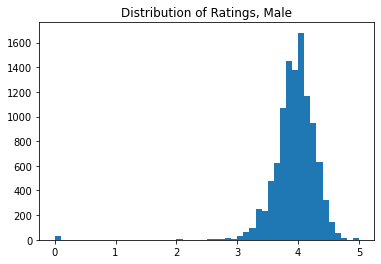

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Distribution of Ratings, Male')
hist = ax.hist([male_ratings], bins=50)
plt.show()

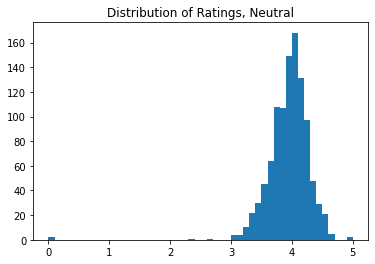

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Distribution of Ratings, Neutral')
hist = ax.hist([neutral_ratings], bins=50)
plt.show()